### Testowanie uczenia się DFA z pomocą systemu przepisywania więzów

In [57]:
import copy, sys
import cProfile

sys.path.append("../")
sys.path.append("../inferring")
sys.path.append("../utils")
sys.path.append("../utils/DFA")
from importlib import reload


import inferring.Inferring as Inferring, inferring.InferringDFA as InferringDFA
import utils.automats.DFA
import utils.oracles.SRS as SRS

reload(SRS)
reload(Inferring)
reload(InferringDFA)
reload(utils.automats.DFA)

from inferring.Inferring import Inferring
from utils.automats.DFA.DFA import DFA
from utils.oracles.SRS import SRS 

from inferring.InferringDFA import InferringDFA

In [58]:
def run_learning_process(test, oracle=None, check_consistency=False, equiv_query_fashion="BFS", debug=False):
    _dfa = copy.deepcopy(test.dfa)
    learn_dfa = InferringDFA(_dfa, 
                                oracle, 
                                check_consistency=check_consistency, 
                                equiv_query_fashion=equiv_query_fashion,
                                debug=debug)
        
    dfa, cnt, cnt_ex = learn_dfa.run(counterexamples=True)
    print(f"kontrprzykłady: liczba - {len(cnt_ex)}, długości - {cnt_ex}, cnt = {cnt}")
    return copy.deepcopy(dfa), cnt, cnt_ex

In [40]:
class test_example():
    def __init__(self, dfa, descrip=''):
        self.dfa = copy.deepcopy(dfa)
        self.descrip = descrip

In [4]:
test_examples = []

dfa_ = DFA()
dfa_.create_convolution(dfa1=DFA(Q=2, input_signs=['a', 'b'], δ = {(0,'a'):1, (0, 'b'):0, (1, 'a'):1, (1, 'b'):1}, F=set([1])),
                        dfa2=DFA(Q=2, input_signs=['a', 'b'], δ = {(0,'a'):1, (0, 'b'):0, (1, 'a'):1, (1, 'b'):1}, F=set([1])))
test = test_example(dfa=dfa_, descrip="plot, dfa1 - słowa zawierające literke 'a', dfa2 - słowa zawierające literke 'a'")
test_examples.append(test)
# result, without SRS at all: cnt = [69, 1]

dfa_ = DFA()
dfa_.create_convolution(dfa1=DFA(Q=3, input_signs=['a', 'b'], δ={(0,'a'):0, (0,'b'):1, (1, 'a'):0, (1, 'b'):2, (2, 'a'):2, (2, 'b'):2}, F= set([2])), 
                        dfa2=DFA(Q=3, input_signs=['a', 'b'], δ={(0,'a'):1, (0,'b'):0, (1, 'a'):2, (1, 'b'):0, (2, 'a'):2, (2, 'b'):2}, F= set([2])))
test = test_example(dfa=dfa_, descrip="splot, dfa1 - wzorzec - 'bb', dfa2 - wzorzec 'aa'")
test_examples.append(test)
# result, without SRS at all: cnt = [289, 3]

dfa_ = DFA()
dfa_.create_convolution(dfa1=DFA(Q=4, input_signs=['a', 'b'], δ={(0,'a'):0, (0,'b'):1, (1, 'a'):0, (1, 'b'):2, (2, 'a'):0, (2, 'b'):3, (3, 'a'):3, (3, 'b'):3}, F= set([3])),
                        dfa2=DFA(Q=4, input_signs=['a', 'b'], δ={(0,'a'):1, (0,'b'):0, (1, 'a'):2, (1, 'b'):0, (2, 'a'):3, (2, 'b'):0, (3, 'a'):3, (3, 'b'):3}, F= set([3])))
test = test_example(dfa=dfa_, descrip="splot, dfa1 - wzorzec 'bbb', dfa2 - wzorzec 'aaa'")
test_examples.append(test)
# result, without SRS at all: cnt = [800, 3]

dfa_ = DFA()
dfa_.create_convolution(dfa1 = DFA(Q=4, input_signs=['a', 'b'], δ = {(0, 'a'):1, (0, 'b'):0, (1, 'a'):1, (1, 'b'):2, (2, 'a'):3, (2, 'b'):0, (3, 'a'):3, (3, 'b'):3}, F=set([3])),
                        dfa2 = DFA(Q=4, input_signs=['a', 'b'], δ = {(0, 'a'):0, (0, 'b'):1, (1, 'a'):0, (1, 'b'):2, (2, 'a'):0, (2, 'b'):3, (3, 'a'):3, (3, 'b'):3}, F=set([3])))
test = test_example(dfa = dfa_, descrip = "splot, dfa1 - wzorzec 'aba', dfa2 - wzorzec 'bbb'")
test_examples.append(test)
# result, without SRS at all: cnt = [1388, 7]


dfa_ = DFA()
dfa_.create_convolution(dfa1=DFA(Q=4, input_signs=['a', 'b'], δ={(0, 'a'):2, (0,'b'):1, (1, 'b'):1, (1, 'a'):3, (2, 'a'):2, (2, 'b'):3, (3, 'a'):3, (3, 'b'):3}, F=set([3])),
                        dfa2=DFA(Q=4, input_signs=['a', 'b'], δ={(0, 'a'):2, (0,'b'):1, (1, 'b'):1, (1, 'a'):3, (2, 'a'):2, (2, 'b'):3, (3, 'a'):3, (3, 'b'):3}, F=set([3])))
test = test_example(dfa=dfa_, descrip="splot, dfa1 - słowa zawierające i literę 'a' i literę 'b', dfa2 - słowa zawierające i literę 'a' i literę 'b'")
test_examples.append(test)
# result, without SRS at all: cnt = [751, 10]

dfa_ = DFA(Q=3, input_signs=['0', '1', '2', '3', '4', '5', '6', '7'], δ={(0,'0'):0, (0,'1'):2, (0,'2'):2, (0,'3'):0, (0,'4'):2, (0,'5'):0, (0,'6'):1, (0,'7'):2, (1,'0'):2, (1,'1'):0, (1,'2'):1, (1,'3'):2, (1,'4'):1, (1,'5'):2, (1,'6'):2, (1,'7'):1, (2,'0'):2, (2,'1'):2, (2,'2'):2, (2,'3'):2, (2,'4'):2, (2,'5'):2, (2,'6'):2, (2,'7'):2}, F=set([0]))
test = test_example(dfa=dfa_, descrip="zakodowane dodawania w systemie dwójkowym")
test_examples.append(test)
# result, without SRS at all: cnt = [201, 1]

dfa_ = DFA()
dfa_.create_convolution(dfa1=DFA(Q=5, input_signs=['a', 'b'], δ={(0,'a'):1, (0,'b'):3, (1,'a'):2, (1,'b'):3, (2,'a'):2, (2,'b'):2, (3,'a'):1, (3,'b'):4, (4,'a'):4, (4,'b'):4}, F=set([2, 4])),
                        dfa2=DFA(Q=5, input_signs=['a', 'b'], δ={(0,'a'):1, (0,'b'):3, (1,'a'):2, (1,'b'):3, (2,'a'):2, (2,'b'):2, (3,'a'):1, (3,'b'):4, (4,'a'):4, (4,'b'):4}, F=set([2, 4])))
test = test_example(dfa=dfa_, descrip="splot, dfa1 - 2 wzorce 'aa' lub 'bb', dfa2 - 2 wzorce 'aa' lub 'bb'" )
test_examples.append(test)
# result, without SRS at all: cnt = [1437, 7]

dfa_ = DFA()
dfa_.create_convolution(dfa1=DFA(Q=9, input_signs=['a', 'b'], δ={(0,'a'):1, (0,'b'):3, (1,'a'):2, (1,'b'):3, (2,'a'):2, (2,'b'):5, (3,'a'):1, (3,'b'):4, (4,'a'):7, (4,'b'):4, (5,'a'):5, (5,'b'):6, (6,'a'):6, (6,'b'):6, (7,'a'):8, (7,'b'):7, (8,'a'):8, (8,'b'):8}, F=set([6, 8])),
                        dfa2=DFA(Q=9, input_signs=['a', 'b'], δ={(0,'a'):1, (0,'b'):3, (1,'a'):2, (1,'b'):3, (2,'a'):2, (2,'b'):5, (3,'a'):1, (3,'b'):4, (4,'a'):7, (4,'b'):4, (5,'a'):5, (5,'b'):6, (6,'a'):6, (6,'b'):6, (7,'a'):8, (7,'b'):7, (8,'a'):8, (8,'b'):8}, F=set([6, 8])))
test = test_example(dfa=dfa_, descrip="splot, dfa1 - 2 wzorce 'aa' i 'bb', dfa2 - 2 wzorce 'aa' i 'bb'")  
test_examples.append(test)
# result, without SRS at all: cnt = [20522, 28]

dfa_ = DFA()
pdfa1_, pdfa2_ = DFA(), DFA()
pdfa1_.create_pattern_dfa(input_signs=['a', 'b'], patterns=['aa', 'bb'], _type="AND")
pdfa2_.create_pattern_dfa(input_signs=['a', 'b', 'c'], patterns=['aa', 'bb', 'c'], _type="AND")

dfa_.create_convolution(dfa1=pdfa1_, dfa2=pdfa2_)

test = test_example(dfa=dfa_, descrip="splot, dfa1 - 2 wzorce: 'aa', 'bb', dfa2 - 3 wzorce: 'aa', 'bb', 'c'")
test_examples.append(test)
# result, without SRS at all: cnt = [121709, 37]

In [59]:
test = test_examples[-1] 
print(test.descrip)
# d = run_learning_process(copy.deepcopy(test), oracle=None, check_consistency=False, equiv_query_fashion="DFS", debug=True)
# d = run_learning_process(copy.deepcopy(test), oracle=SRS(), check_consistency=False, equiv_query_fashion="DFS")
d, _, _ = run_learning_process(copy.deepcopy(test), oracle=SRS(), check_consistency=True, equiv_query_fashion="DFS")

splot, dfa1 - 2 wzorce: 'aa', 'bb', dfa2 - 3 wzorce: 'aa', 'bb', 'c'
iteracja nr: 1
S = 1, rozmiar E = 6
iteracja nr: 2
S = 1, rozmiar E = 13
iteracja nr: 3
S = 30, rozmiar E = 33
iteracja nr: 4
S = 40, rozmiar E = 40
iteracja nr: 5
S = 55, rozmiar E = 52
iteracja nr: 6
S = 65, rozmiar E = 59
iteracja nr: 7
S = 80, rozmiar E = 74
kontrprzykłady: liczba - 45, długości - [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 9, 9, 9, 9, 11, 10, 10, 10, 10, 10, 10, 10, 10, 11, 9, 12, 9, 12, 11, 9, 9, 9, 9, 15], cnt = [20892, 7]


### Przykład dziwny

In [131]:
patterns1 = ['aaa','bba','cca','ddd']
patterns2 = ['aaa','bbb','ccc','ddd']

pdfa_ = DFA()
pdfa_.create_pattern_dfa(input_signs=['a', 'b', 'c', 'd'], patterns=patterns1, _type="OR")
test_1 = test_example(dfa=pdfa_)

pdfa_ = DFA()
pdfa_.create_pattern_dfa(input_signs=['a', 'b', 'c', 'd'], patterns=patterns2, _type="OR")

test_2 = test_example(dfa=pdfa_)

d1 = run_learning_process(test=test_1)
d2 = run_learning_process(test=test_2)

# kontrprzykłady: [3, 3, 3, 3], cnt = [289, 5]
# kontrprzykłady: [3, 3, 3, 3], cnt = [289, 5]

kontrprzykłady: liczba - 4, długości - [3, 3, 3, 3], cnt = [289, 5]
kontrprzykłady: liczba - 4, długości - [3, 3, 3, 3], cnt = [289, 5]


In [132]:
conv_dfa = DFA() 
conv_dfa.create_convolution(dfa1=d1, dfa2=d2)
d = run_learning_process(test=test_example(dfa=conv_dfa), oracle=SRS(), check_consistency=True, debug=False)
d = run_learning_process(test=test_example(dfa=conv_dfa), oracle=None, check_consistency=False, debug=False)

kontrprzykłady: liczba - 39, długości - [6, 6, 6, 6, 6, 6, 6, 12, 5, 8, 8, 6, 5, 8, 8, 6, 5, 8, 8, 6, 9, 12, 8, 8, 6, 6, 6, 6, 6, 14, 6, 6, 6, 6, 6, 6, 10, 6, 6], cnt = [24258, 4]
kontrprzykłady: liczba - 68, długości - [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], cnt = [69499, 69]


### Duże automaty - ropoznające kilkadziesiąt wzorców (docelowo)

In [12]:
import random 
def random_patterns(input_signs, n=5, max_length=10):
    patterns = []
    for _ in range(n):
        p = ''.join(random.choices(population=input_signs,k=random.randint(1, max_length)))
        while p in set(patterns):
            p = ''.join(random.choices(population=input_signs,k=random.randint(1, max_length)))
        patterns.append(p)
    return patterns

random_patterns(input_signs=['a', 'b', 'c', 'd'], max_length=8)

['dcadcd', 'cca', 'ac', 'dacdddaa', 'cdbd']

In [15]:
random.seed(101)

input_signs = ['a', 'b', 'c', 'd']
number_of_patterns = 8
max_pattern_length = 5 

patterns1, patterns2 = random_patterns(input_signs, number_of_patterns, max_pattern_length), random_patterns(input_signs, number_of_patterns, max_pattern_length)
print(f"patterns1 = {patterns1}")
print(f"patterns2 = {patterns2}")

dfa1 = DFA() 
dfa2 = DFA()

dfa1.create_pattern_dfa(input_signs=input_signs, patterns=patterns1, _type=DFA.OR_TYPE_PATTERN_DFA)
print(f"|Q1| = {dfa1.Q}")

dfa2.create_pattern_dfa(input_signs=input_signs, patterns=patterns2, _type=DFA.OR_TYPE_PATTERN_DFA)
print(f"|Q2| = {dfa2.Q}")

d1 = run_learning_process(test_example(dfa=copy.deepcopy(dfa1)))
d2 = run_learning_process(test_example(dfa=copy.deepcopy(dfa2)))

print(f"after learning |Q1| = {d1.Q}")
s1 = ''.join(patterns1)
ans1 = d1.route(s1)

s2 = ''.join(patterns2)
print(f"after learning |Q2| = {d2.Q}")
ans2 = d2.route(s2)

print(f"{ans1}, {ans2}")

patterns1 = ['ddcba', 'aabca', 'aaad', 'ada', 'baba', 'ccdbb', 'acbd', 'cb']
patterns2 = ['b', 'aca', 'aac', 'dca', 'bdcca', 'a', 'bddda', 'dddaa']
|Q1| = 324000
|Q2| = 55296
kontrprzykłady: liczba - 5, długości - [3, 4, 4, 5, 5], cnt = [530, 6]
kontrprzykłady: liczba - 0, długości - [], cnt = [37, 1]
after learning |Q1| = 14
after learning |Q2| = 2
('ddcbaaabcaccdbbaaadbabaacbdadacb', 1), ('bdccabdddadddaaacaaacdcaba', 1)


In [16]:
d2.print_transitions()

(0,a) --> 1
(0,b) --> 1
(0,c) --> 0
(0,d) --> 0
(1,a) --> 1
(1,b) --> 1
(1,c) --> 1
(1,d) --> 1
stany akceptujące - {1}


In [17]:
dfa_ = DFA() 
dfa_.create_convolution(dfa1=copy.deepcopy(d1), dfa2=copy.deepcopy(d2))

dfa_.route(s1+s2.upper())
print(f"|Q_conv(d1,d2)| = {dfa_.Q}")

test = test_example(dfa=dfa_, descrip=f"splot, dfa1 - wzorce: {patterns1}, dfa2 - wzorce: {patterns2}")
print(test.descrip)

|Q_conv(d1,d2)| = 28
splot, dfa1 - wzorce: ['ddcba', 'aabca', 'ccdbb', 'aaad', 'baba', 'acbd', 'ada', 'cb'], dfa2 - wzorce: ['bdcca', 'bddda', 'dddaa', 'aca', 'aac', 'dca', 'b', 'a']


In [ ]:
# cProfile.run('run_learning_process(test, oracle=None, check_consistency=False, debug=False)', sort='time')
run_learning_process(test, oracle=None, check_consistency=False, debug=False)

In [ ]:
# cProfile.run('run_learning_process(test, oracle=SRS(), check_consistency=True, debug=False)', sort='time')
run_learning_process(test, oracle=SRS(), check_consistency=True, debug=False)

### Uczenie się losowych automatów

In [55]:
class Record:
    def __init__(self, d1, d2, conv, cnt_normal, cnt_with_advice):
        self.d1 = d1
        self.d2 = d2
        self.conv = conv
        self.cnt_normal = cnt_normal
        self.cnt_with_advice = cnt_with_advice
    def print_record(self):
        print(f"|d1| = {self.d1}, |d2| = {self.d2}, |conv| = {self.conv}, cnt_normal = {self.cnt_normal} vs cnt_with_advice = {self.cnt_with_advice}") 

In [ ]:
seeds = [37, 87, 97, 113, 47, 17, 227] #101, 73, 29,

input_signs = ['a', 'b', 'c', 'd']
max_number_of_states = 60
number_of_itreations = len(seeds)

results = []

i = 0 
while i < number_of_itreations: 
    random.seed(seeds[i])
    i += 1

    dfa1 = DFA()
    dfa2 = DFA()
    dfa1.create_random_dfa(Q=random.randint(max_number_of_states//2,max_number_of_states), input_signs=input_signs)
    dfa2.create_random_dfa(Q=random.randint(max_number_of_states//2,max_number_of_states), input_signs=input_signs)
    print(f"(initially) d1_size = {dfa1.Q}, d2_size = {dfa2.Q}")
    
    d1, _, _ = run_learning_process(test_example(dfa=copy.deepcopy(dfa1)))   
    d2, _, _ = run_learning_process(test_example(dfa=copy.deepcopy(dfa2)))

    print(f"(minimal) d1_size = {d1.Q}, d2_size = {d2.Q}")
    conv_dfa = DFA()
    conv_dfa.create_convolution(dfa1=d1, dfa2=d2) 
    print(f"(initially) conv_dfa_size = {conv_dfa.Q}")
    
    conv_with_advice, cnt_with_advice, cnt_ex_with_advice = run_learning_process(test=test_example(dfa=conv_dfa), oracle=SRS(), check_consistency=True) 
    conv_with_advice.type = DFA.CONV_DFA
    print(f"(minimal) conv_dfa_size = {conv_with_advice.Q}")
    conv_normal, cnt_normal, cnt_ex_normal = run_learning_process(test=test_example(dfa=conv_with_advice), oracle=None, check_consistency=False)

    results.append(Record(d1=d1.Q, d2=d2.Q, conv=conv_with_advice.Q, cnt_normal=cnt_normal, cnt_with_advice=(cnt_with_advice, len(cnt_ex_with_advice))))

(initially) d1_size = 48, d2_size = 31
kontrprzykłady: liczba - 6, długości - [3, 4, 4, 4, 5, 5], cnt = [1643, 7]
kontrprzykłady: liczba - 9, długości - [4, 4, 4, 4, 4, 5, 5, 5, 7], cnt = [1304, 10]
(minimal) d1_size = 48, d2_size = 30
(initially) conv_dfa_size = 1440
iteracja nr: 1
S = 1, rozmiar E = 9
iteracja nr: 2
S = 1392, rozmiar E = 113
kontrprzykłady: liczba - 111, długości - [3, 3, 4, 3, 3, 4, 5, 4, 4, 6, 6, 7, 7, 8, 8, 9, 8, 10, 9, 10, 6, 6, 8, 11, 10, 10, 10, 8, 7, 7, 7, 9, 14, 12, 9, 11, 13, 10, 10, 10, 14, 9, 12, 11, 13, 6, 9, 13, 13, 9, 9, 16, 15, 12, 12, 7, 17, 9, 11, 12, 12, 8, 10, 13, 17, 8, 5, 13, 18, 10, 17, 16, 18, 9, 12, 8, 15, 9, 15, 13, 12, 8, 12, 14, 18, 13, 8, 11, 12, 12, 13, 8, 8, 15, 16, 10, 9, 13, 10, 19, 19, 17, 8, 6, 8, 8, 11, 13, 11, 12, 13], cnt = [847221, 2]
(minimal) conv_dfa_size = 1440
iteracja nr: 1
S = 1, rozmiar E = 9
iteracja nr: 2
S = 33, rozmiar E = 10
iteracja nr: 3
S = 39, rozmiar E = 11
iteracja nr: 4
S = 69, rozmiar E = 12
iteracja nr: 5
S 

KeyboardInterrupt: 

In [63]:
for r in results:
    r.print_record()

|d1| = 48, |d2| = 30, |conv| = 1440, cnt_normal = [1684967, 114] vs cnt_with_advice = ([847221, 2], 111)
|d1| = 38, |d2| = 47, |conv| = 1786, cnt_normal = [2052278, 88] vs cnt_with_advice = ([1095907, 2], 113)
|d1| = 47, |d2| = 51, |conv| = 2397, cnt_normal = [5153857, 183] vs cnt_with_advice = ([2557155, 2], 208)


seeds = 101, 73, 29
max_number_of_states = 60 

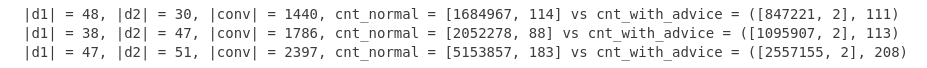

### Uczenie się splotu DFA - **debugowanie** 

In [60]:
import BitVector
bv = BitVector.BitVector(bitlist =[1, 1, 0, 1])
print(f"bv = {bv}, int(bv) = {int(bv)}")

bv_ = BitVector.BitVector(bitlist = [1])
bv = bv + bv_

print(f"bv = {bv}, int(bv) = {int(bv)}")

bv = 1101, int(bv) = 13
bv = 11011, int(bv) = 27


<!-- ### Uczenie się splotów - **debugowanie**  -->